In [1]:
!pip3 install numpy pandas matplotlib seaborn scikit-learn joblib nltk flask scipy


  Using cached numpy-2.2.4-cp312-cp312-macosx_14_0_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp312-cp312-macosx_10_9_x86_64.whl.metadata (89 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-macosx_10_13_x86_64.whl.metadata (31 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached scipy-1.15.2-cp312-cp312-macosx_14_0_x86_64.whl.metadata (61 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached regex-2024.11.6-cp312-cp312-macosx_10_13_x86_64.whl.metadata (40 kB)
  Using cac

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# For scaling features
from sklearn.preprocessing import StandardScaler

# Clustering algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering

# For hierarchical clustering dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Set default figure size
plt.rcParams['figure.figsize'] = (10, 6)

# Display inline plots
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv('/Users/muhammadalizaffar/Developers_hub/Task 4/Mall_Customers.csv')

# Display the first few rows and basic information
print("Dataset preview:")
print(df.head())

print("\nDataset info:")
df.info()

print("\nDescriptive statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Dataset preview:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descriptive statistics:

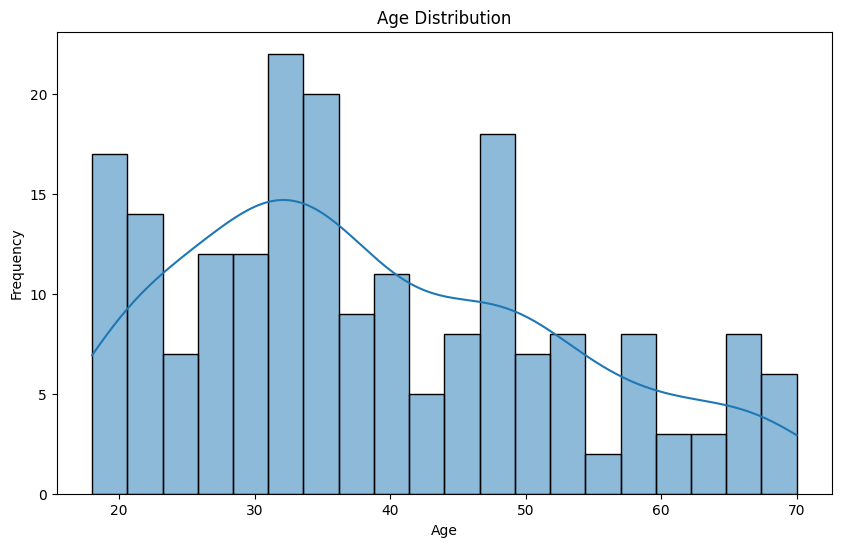

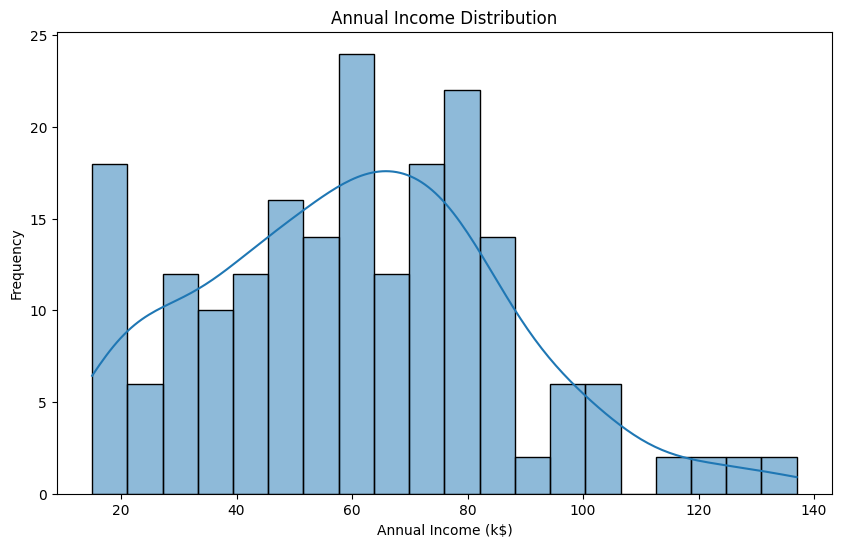

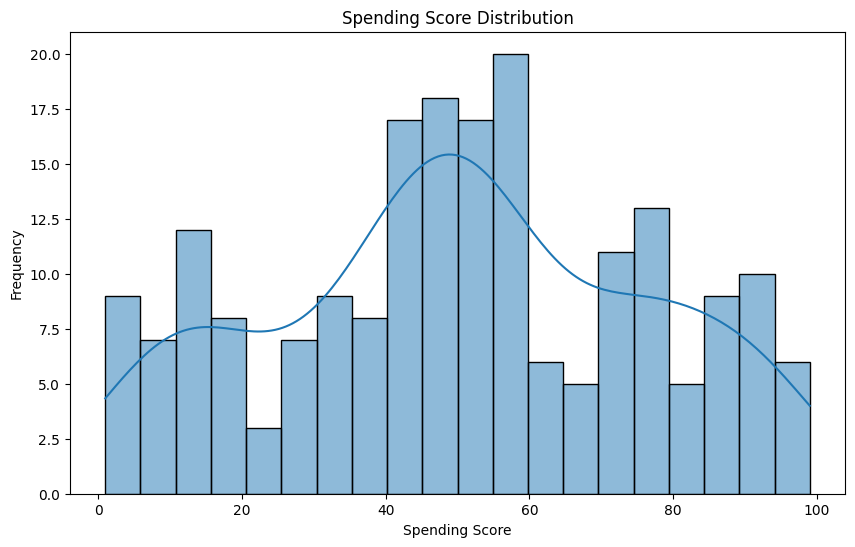

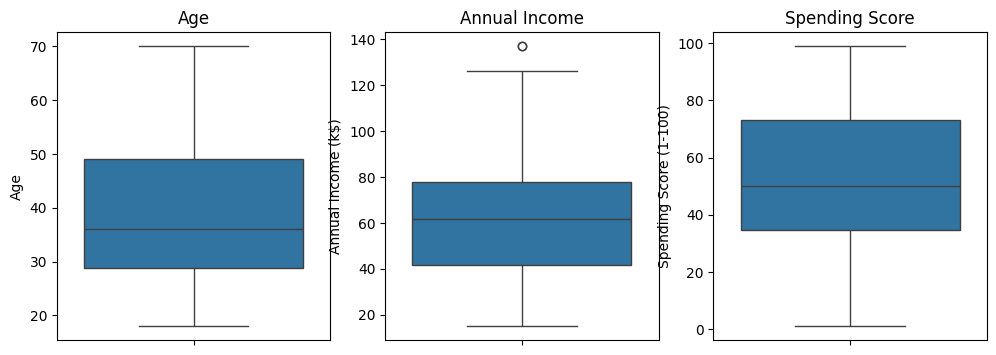

In [4]:
# Distribution of Age
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Annual Income (k$)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

# Distribution of Spending Score
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')
plt.show()

# Boxplots for visualizing potential outliers
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(df['Age'])
plt.title('Age')

plt.subplot(1,3,2)
sns.boxplot(df['Annual Income (k$)'])
plt.title('Annual Income')

plt.subplot(1,3,3)
sns.boxplot(df['Spending Score (1-100)'])
plt.title('Spending Score')
plt.show()


In [5]:
# Select features for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features for better clustering performance
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Save the scaler for later use in prediction (optional)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

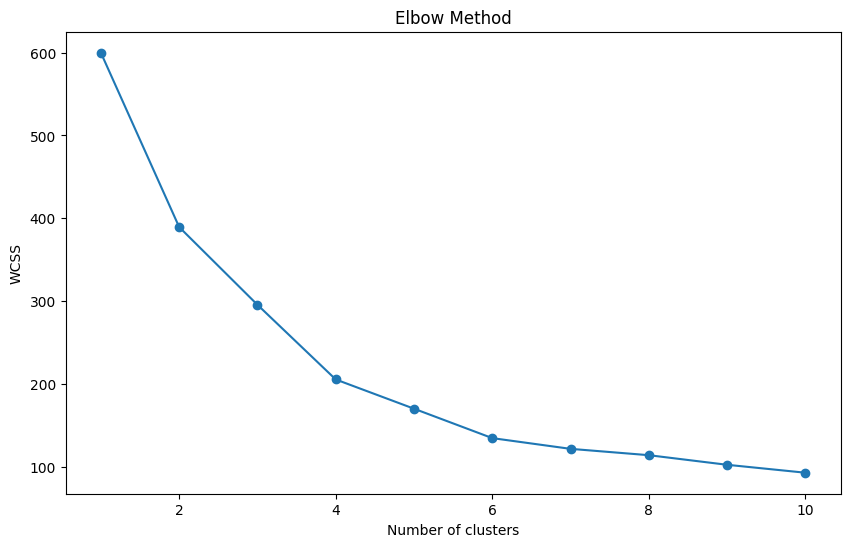

In [6]:
# Elbow Method for K-Means
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [7]:
# Apply K-Means clustering (let's choose 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Save the KMeans model
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

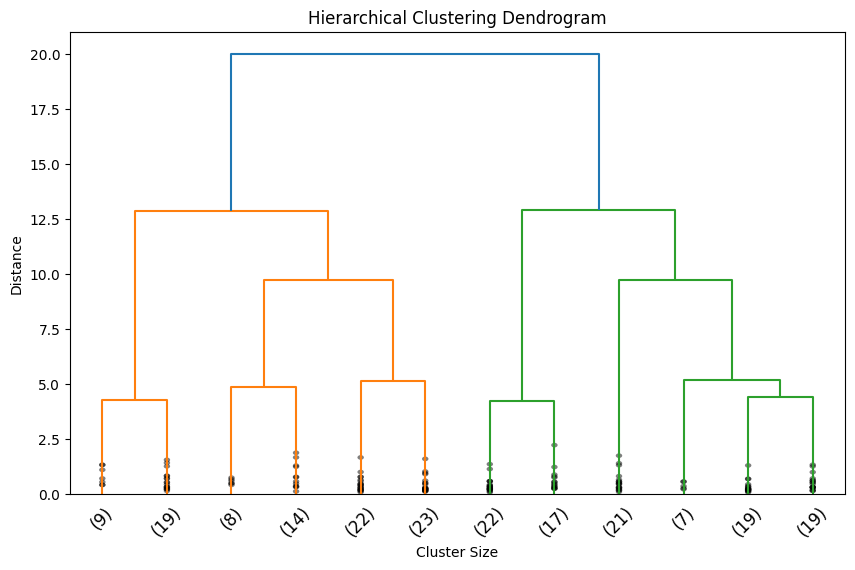

In [8]:
# Use Agglomerative Clustering for hierarchical clustering (also with 5 clusters)
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(features_scaled)
df['Hierarchical_Cluster'] = hierarchical_labels

# Optionally, generate and display a dendrogram (using linkage for visualization)
linked = linkage(features_scaled, method='ward')
dendrogram(linked,
           truncate_mode='lastp',
           p=12,
           leaf_rotation=45.,
           leaf_font_size=12.,
           show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


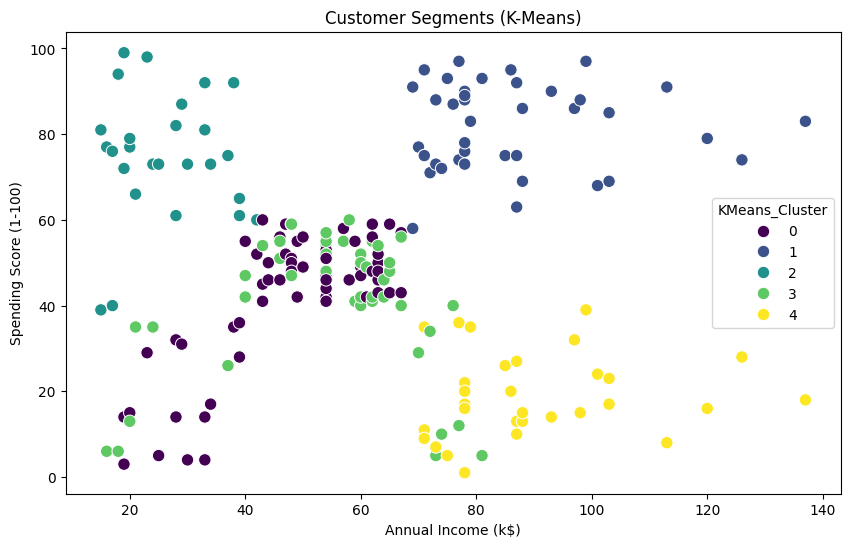

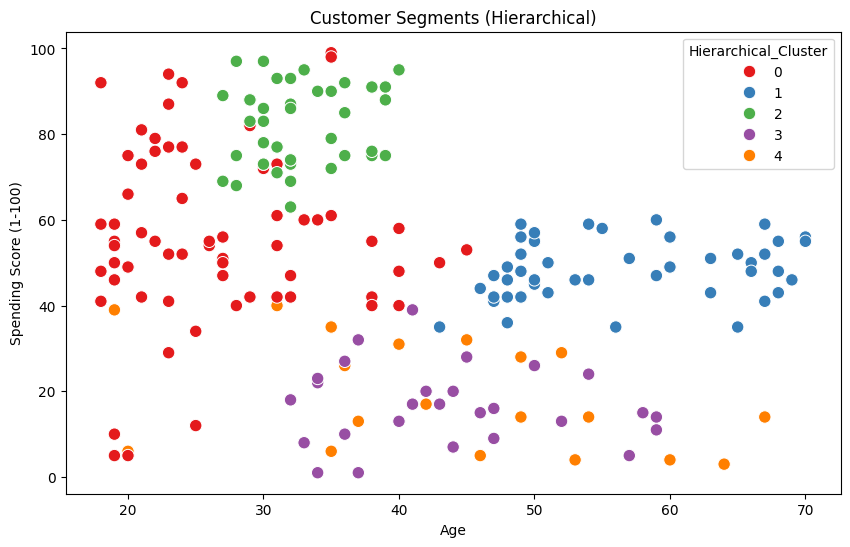

In [9]:
# Visualize K-Means clusters using Annual Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='KMeans_Cluster', data=df, palette='viridis', s=80)
plt.title('Customer Segments (K-Means)')
plt.show()

# Visualize Hierarchical clusters using Age vs Spending Score
sns.scatterplot(x='Age', y='Spending Score (1-100)', 
                hue='Hierarchical_Cluster', data=df, palette='Set1', s=80)
plt.title('Customer Segments (Hierarchical)')
plt.show()


In [10]:
# For K-Means, check centroids in original scale
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
centroid_df = pd.DataFrame(centroids, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print("K-Means Cluster Centroids:")
print(centroid_df)

# Summary statistics for each K-Means cluster
print("\nCluster Summary Statistics:")
print(df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())


K-Means Cluster Centroids:
         Age  Annual Income (k$)  Spending Score (1-100)
0  55.275862           47.620690               41.706897
1  32.875000           86.100000               81.525000
2  25.769231           26.115385               74.846154
3  26.733333           54.311111               40.911111
4  44.387097           89.774194               18.483871

Cluster Summary Statistics:
                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               55.275862           47.620690               41.706897
1               32.875000           86.100000               81.525000
2               25.769231           26.115385               74.846154
3               26.733333           54.311111               40.911111
4               44.387097           89.774194               18.483871
